Problem 1:

Exponential smoothing can be used to identify the clogging of air filters used in engines (locomotives, car, etc). For each air filter, the differential pressure is recorded each minute. We could build an exponential smoothing model for each air filter including cyclic effects and we could see the trend of how quickly the air filter clogs over the course of time.

In [1]:
#reading the data
data <- read.table('./temps.txt', header = T)

In [2]:
head(data)

DAY,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,⋯,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015
1-Jul,98,86,91,84,89,84,90,73,82,⋯,93,95,85,95,87,92,105,82,90,85
2-Jul,97,90,88,82,91,87,90,81,81,⋯,93,85,87,90,84,94,93,85,93,87
3-Jul,97,93,91,87,93,87,87,87,86,⋯,93,82,91,89,83,95,99,76,87,79
4-Jul,90,91,91,88,95,84,89,86,88,⋯,91,86,90,91,85,92,98,77,84,85
5-Jul,89,84,91,90,96,86,93,80,90,⋯,90,88,88,80,88,90,100,83,86,84
6-Jul,93,84,89,91,96,87,93,84,90,⋯,81,87,82,87,89,90,98,83,87,84


In [3]:
num_rows = nrow(data)

In [4]:
data <- as.vector(unlist(data[,:21]))

In [5]:
time_series <- ts(data,start=1996,frequency=num_rows)

In [7]:
#performing single exponential smoothing
single_exp <- HoltWinters(time_series, beta = F, gamma = F)

In [8]:
single_exp

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = time_series, beta = F, gamma = F)

Smoothing parameters:
 alpha: 0.8388021
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 63.30952

In [9]:
double_exp <- HoltWinters(time_series, gamma = F)

In [10]:
double_exp

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = time_series, gamma = F)

Smoothing parameters:
 alpha: 0.8445729
 beta : 0.003720884
 gamma: FALSE

Coefficients:
        [,1]
a 63.2530022
b -0.0729933

#### It can be seen that beta is very close to zero. Hence there is no significant trend.

In [11]:
#triple exponential model with additive seasonal effects.
triple_exp_add <- HoltWinters(time_series, seasonal = 'additive')

In [12]:
triple_exp_add

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = time_series, seasonal = "additive")

Smoothing parameters:
 alpha: 0.6610618
 beta : 0
 gamma: 0.6248076

Coefficients:
              [,1]
a     71.477236414
b     -0.004362918
s1    18.590169842
s2    17.803098732
s3    12.204442890
s4    13.233948865
s5    12.957258705
s6    11.525341233
s7    10.854441534
s8    10.199632666
s9     8.694767348
s10    5.983076192
s11    3.123493477
s12    4.698228193
s13    2.730023168
s14    2.995935818
s15    1.714600919
s16    2.486701224
s17    6.382595268
s18    5.081837636
s19    7.571432660
s20    6.165047647
s21    9.560458487
s22    9.700133847
s23    8.808383245
s24    8.505505527
s25    7.406809208
s26    6.839204571
s27    6.368261304
s28    6.382080380
s29    4.552058253
s30    6.877476437
s31    4.823330209
s32    4.931885957
s33    7.109879628
s34    6.178469084
s35    4.886891317
s36    3.890547248
s37    2.148316257
s38    2.524866001

#### Again, the beta is zero. Suggesting no significant trend.

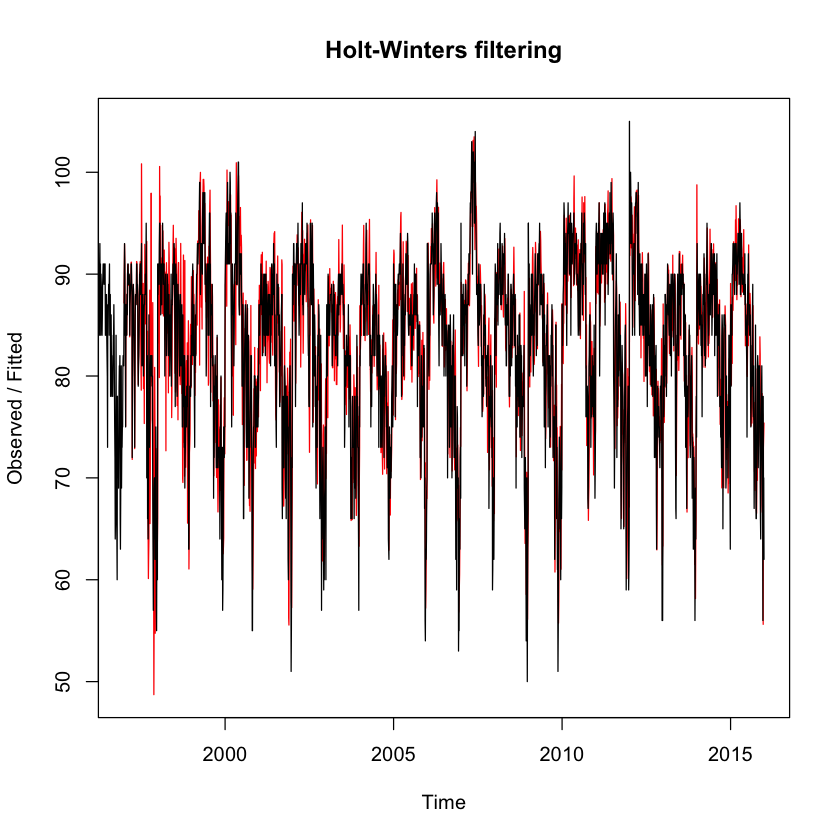

In [13]:
plot(triple_exp_add)

In [14]:
triple_exp_mul <- HoltWinters(time_series, seasonal = "multiplicative")

In [15]:
triple_exp_mul

Holt-Winters exponential smoothing with trend and multiplicative seasonal component.

Call:
HoltWinters(x = time_series, seasonal = "multiplicative")

Smoothing parameters:
 alpha: 0.615003
 beta : 0
 gamma: 0.5495256

Coefficients:
             [,1]
a    73.679517064
b    -0.004362918
s1    1.239022317
s2    1.234344062
s3    1.159509551
s4    1.175247483
s5    1.171344196
s6    1.151038408
s7    1.139383104
s8    1.130484528
s9    1.110487514
s10   1.076242879
s11   1.041044609
s12   1.058139281
s13   1.032496529
s14   1.036257448
s15   1.019348815
s16   1.026754142
s17   1.071170378
s18   1.054819556
s19   1.084397734
s20   1.064605879
s21   1.109827336
s22   1.112670130
s23   1.103970506
s24   1.102771209
s25   1.091264692
s26   1.084518342
s27   1.077914660
s28   1.077696145
s29   1.053788854
s30   1.079454300
s31   1.053481186
s32   1.054023885
s33   1.078221405
s34   1.070145761
s35   1.054891375
s36   1.044587771
s37   1.023285461
s38   1.025836722
s39   1.031075732
s40   1.031

#### no significant trend observed again.

In all the above models, the trend is zero, suggesting there isn't a significant increase or decrease over the years. 

quite confused with nrow argument here. TA used ncol = 123. But the plot of seasonal factors
dont make sense to me. When we print the output of HoltWinter for seasonal = Multiplicative
we see that the seasonal factors are decreasing. This behaviour is not achieved for ncol =123
Hence, I decided to use nrow = 123. I would be more than happy to know the correct approach.
I also believe the seasonal factors should decrease in a given year.

In [16]:
mat <- matrix(triple_exp_mul$fitted[,4], nrow = 123)

In [17]:
write.csv(mat, file = 'SF.csv')

In [19]:
mat1 <- matrix(triple_exp_mul$fitted[,4], ncol = 123)

In [20]:
write.csv(mat1, file = 'SF1.csv')

I have attached two additional files. One when CUSUM is performed for mat (i.e. nrow = 123) and other is CUSUM for mat1 (i.e. ncol = 123). I feel the right way to use is nrow = 123. I'm not sure how to interpret the results for ncol = 123.

For ncol = 123, no clear change is detected for different values of C and T. But when we use CUSUM on nrow = 123, change is detected each year around 1st October - 7th October. Not a significant change over the years, hence we can say summers are not getting longer.